# Módulo 10 tarefa 03
Considere a mesma base de dados utilizada na tarefa 1 ```previsao_de_renda.csv```.

In [1]:
# Importe de bibliotecas
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Importando os dados
link = "https://raw.githubusercontent.com/gfsilveira/ebac/main/"
link += "03-Cientista%20de%20Dados/02-Crisp-DM/M%C3%B3dulo_10/"
link += "Profissao-%20Cientista%20de%20Dados_M10_support%20material.csv"

df = pd.read_csv(link)
df.drop(["Unnamed: 0","index"], axis=1, inplace=True)
df.head()

,data_ref,sexo,posse_de_veiculo,posse_de_imovel,qtd_filhos,tipo_renda,educacao,estado_civil,tipo_residencia,idade,tempo_emprego,qt_pessoas_residencia,mau,renda
0,2015-01-01,F,False,True,1,Assalariado,Secundário,Casado,Casa,36,3.575342,3.0,False,3369.24
1,2015-01-01,M,True,True,0,Empresário,Secundário,Casado,Casa,42,0.860274,2.0,False,6096.14
2,2015-01-01,M,True,True,2,Assalariado,Superior completo,Casado,Casa,31,8.065753,4.0,False,5658.98
3,2015-01-01,F,True,False,0,Empresário,Secundário,Casado,Casa,50,1.208219,2.0,False,7246.69
4,2015-01-01,M,False,False,0,Assalariado,Secundário,Casado,Casa,52,13.873973,2.0,False,4017.37


# 1) Construa um gráfico de barras para avaliar a distribuição das variáveis qualitativas no tempo. Você acha que houve alguma alteração importante a ser investigada?

In [3]:
# Selecionando os dados de variáveis qualitativas, renda e data
df_select = df.iloc[:,[0,1,2,3,5,6,7,8,13]].copy()
df_select['data_ref'] = pd.to_datetime(df_select['data_ref'])
df_select.head()

,data_ref,sexo,posse_de_veiculo,posse_de_imovel,tipo_renda,educacao,estado_civil,tipo_residencia,renda
0,2015-01-01,F,False,True,Assalariado,Secundário,Casado,Casa,3369.24
1,2015-01-01,M,True,True,Empresário,Secundário,Casado,Casa,6096.14
2,2015-01-01,M,True,True,Assalariado,Superior completo,Casado,Casa,5658.98
3,2015-01-01,F,True,False,Empresário,Secundário,Casado,Casa,7246.69
4,2015-01-01,M,False,False,Assalariado,Secundário,Casado,Casa,4017.37


In [4]:
# Verificando as informações das variáveis
df_select.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   data_ref          15000 non-null  datetime64[ns]
 1   sexo              15000 non-null  object        
 2   posse_de_veiculo  15000 non-null  bool          
 3   posse_de_imovel   15000 non-null  bool          
 4   tipo_renda        15000 non-null  object        
 5   educacao          15000 non-null  object        
 6   estado_civil      15000 non-null  object        
 7   tipo_residencia   15000 non-null  object        
 8   renda             15000 non-null  float64       
dtypes: bool(2), datetime64[ns](1), float64(1), object(5)
memory usage: 849.7+ KB


In [5]:
# Selecionando os dados mensais e verificando a distribuição
df_select['mes'] = df_select['data_ref'].dt.to_period('M')
df_select['mes'].value_counts()

2015-01    1000
2015-02    1000
2015-03    1000
2015-04    1000
2015-05    1000
2015-06    1000
2015-07    1000
2015-08    1000
2015-09    1000
2015-10    1000
2015-11    1000
2015-12    1000
2016-01    1000
2016-02    1000
2016-03    1000
Freq: M, Name: mes, dtype: int64

In [6]:
def grafico_barras_stack(coluna: str) -> None:
  '''
    Função de plot de gráfico de barras empilhado com a frequência de instâncias
    para a variável selecionada ao longo do tempo.
    :param coluna (str): Coluna de interesse.
  '''
  x = "mes"
  tab = pd.crosstab(df_select[x],df_select[coluna])
  tab = tab.div(tab.sum(axis=1), axis=0)

  title = f"Renda média ao longo dos meses para {coluna.replace('_',' ').title()}"

  tab.plot.bar(
      figsize=(18,5),
      title=title,
      xlabel=x.title(),
      ylabel="Frequência "+coluna.title(),
      stacked=True
  )
  plt.legend(bbox_to_anchor=(1.02, 1.05), loc=2, borderaxespad=0.)

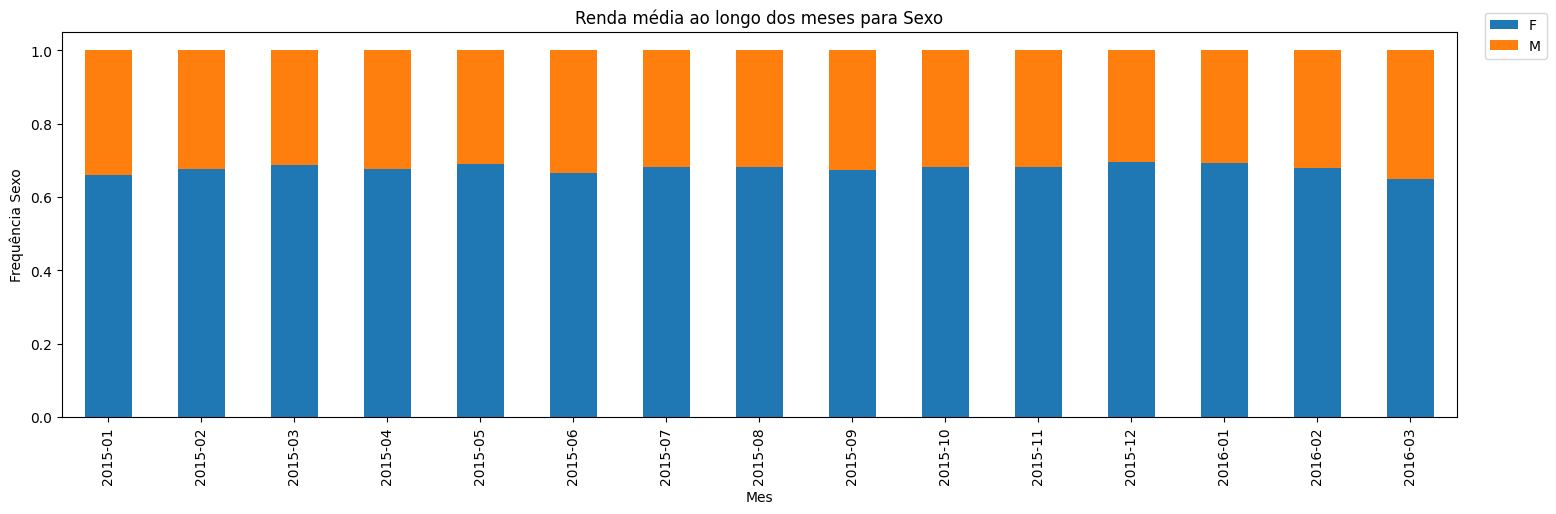

In [7]:
# Plotando do gráfico
c = 1
grafico_barras_stack(coluna=df_select.columns[c])

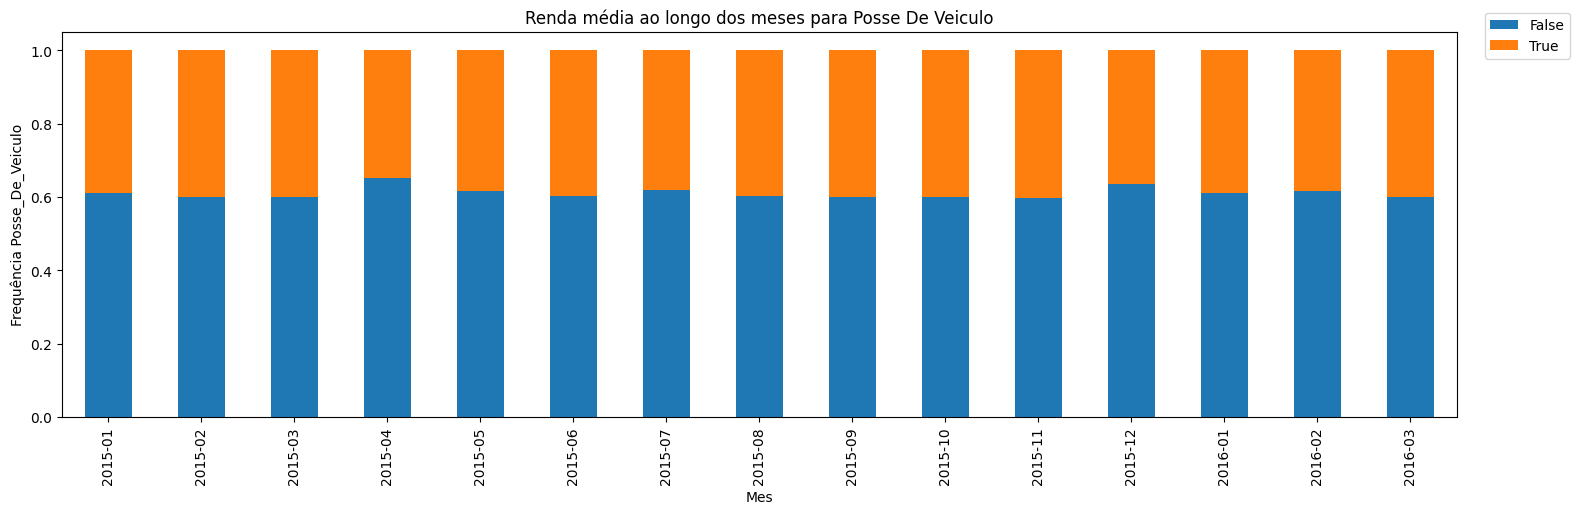

In [8]:
# Plotando do gráfico
c += 1
grafico_barras_stack(coluna=df_select.columns[c])

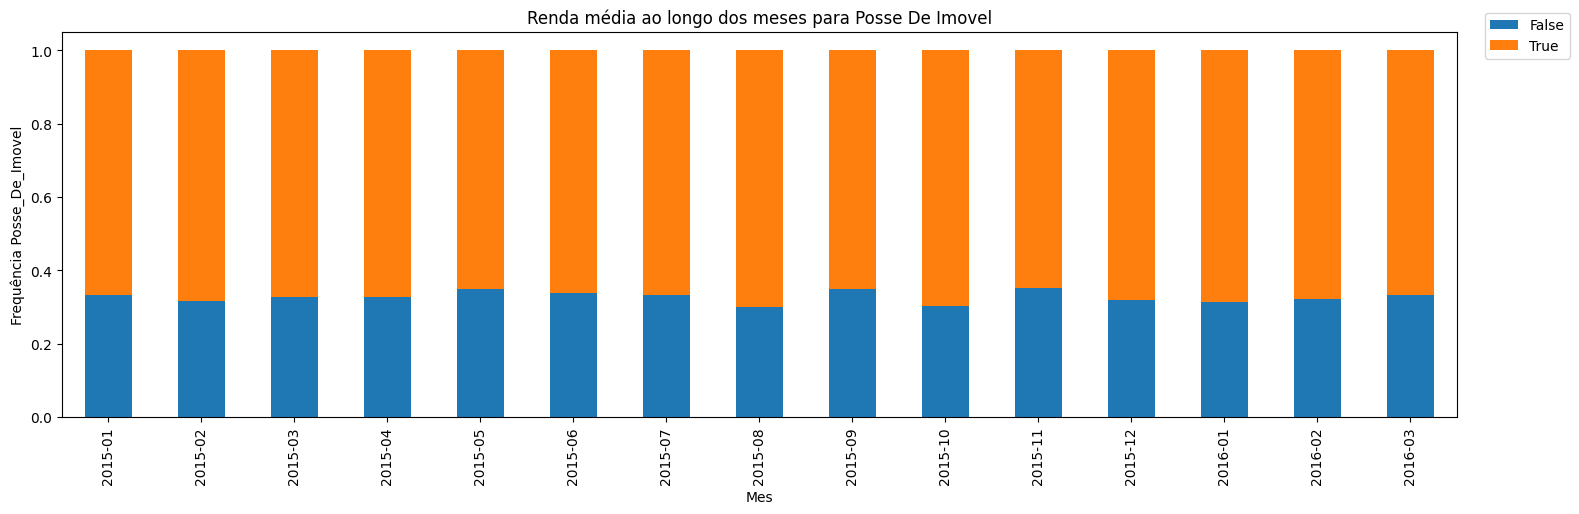

In [9]:
# Plotando do gráfico
c += 1
grafico_barras_stack(coluna=df_select.columns[c])

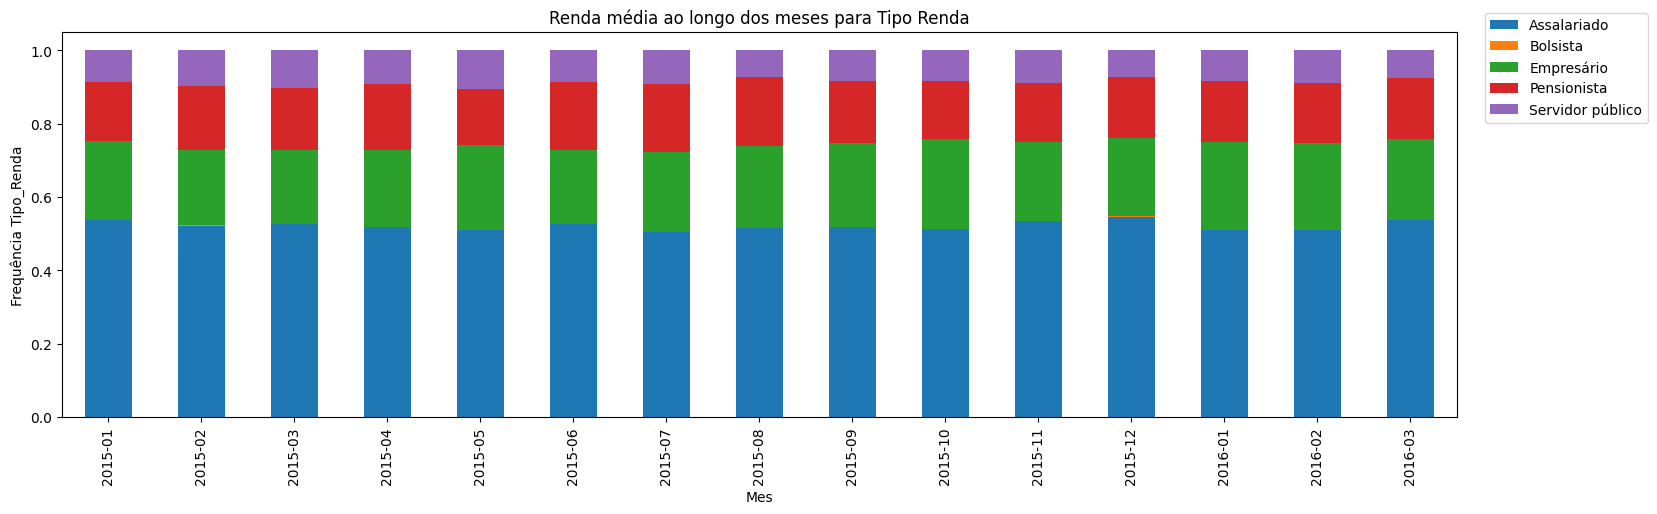

In [10]:
# Plotando do gráfico
c += 1
grafico_barras_stack(coluna=df_select.columns[c])

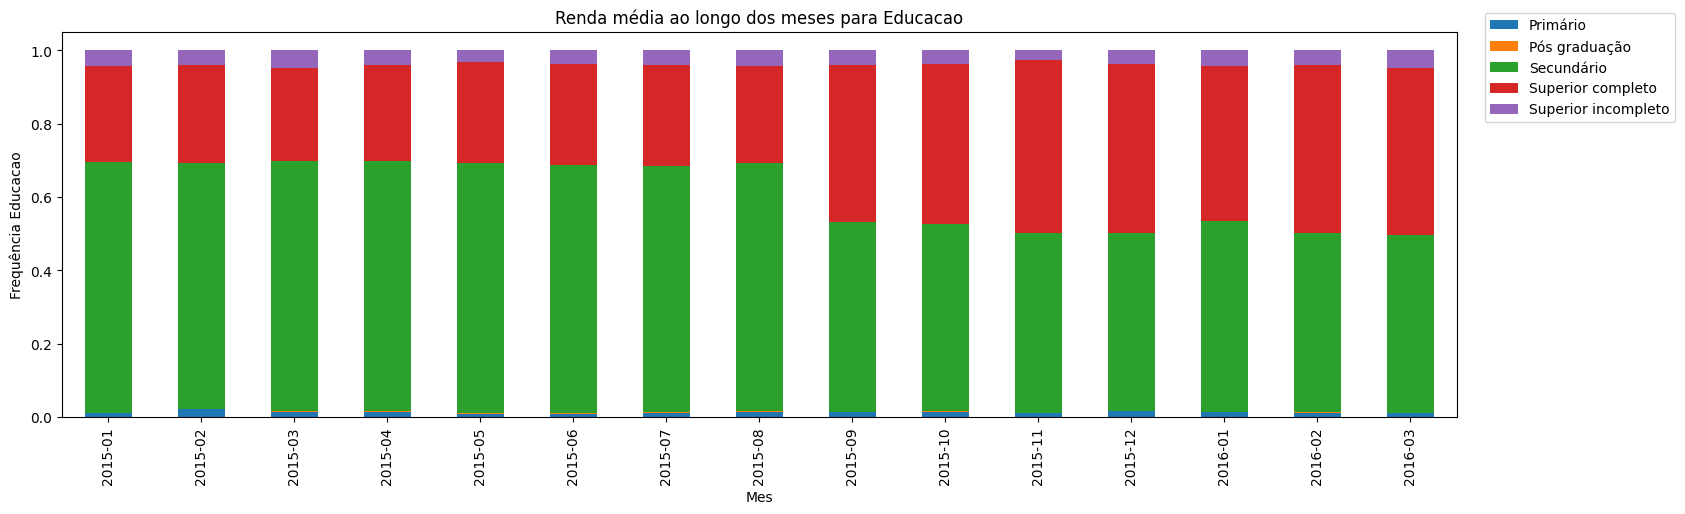

In [11]:
# Plotando do gráfico
c += 1
grafico_barras_stack(coluna=df_select.columns[c])

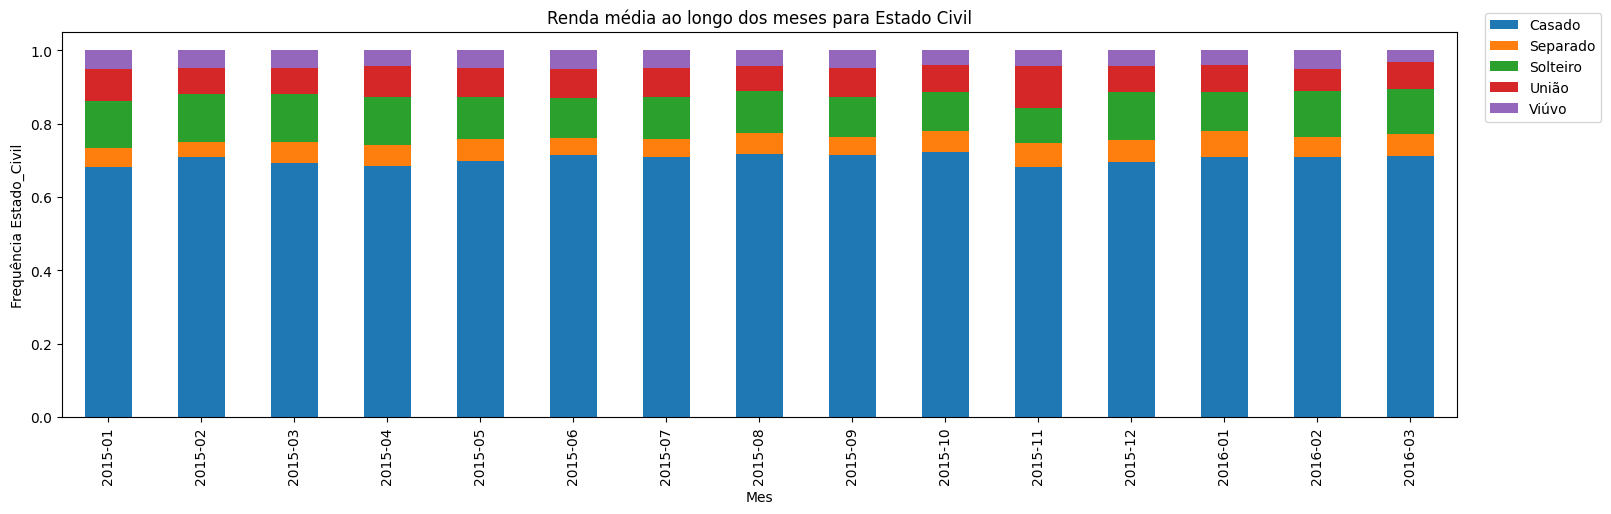

In [12]:
# Plotando do gráfico
c += 1
grafico_barras_stack(coluna=df_select.columns[c])

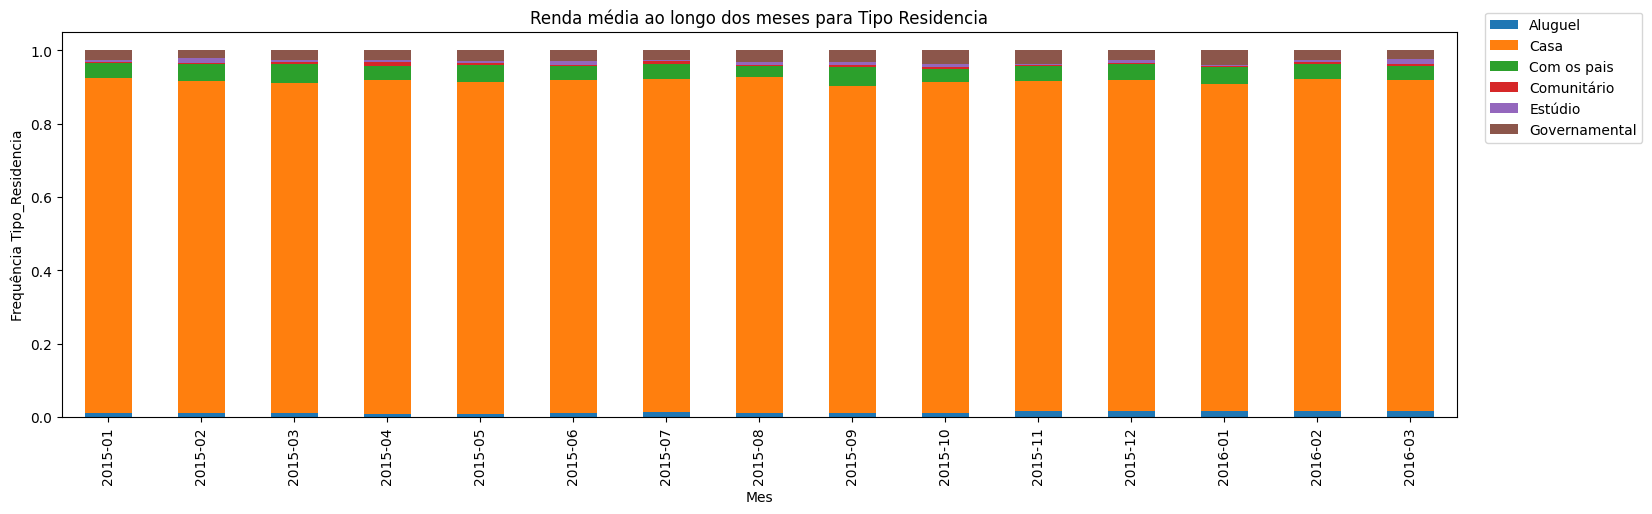

In [13]:
# Plotando do gráfico
c += 1
grafico_barras_stack(coluna=df_select.columns[c])

## Conclusão

- Os gráficos de barra mostram uma relação entre as classes das variáveis qualitativas onde alguns dos valores são superiores aos demais. Isso significa que existem diferenças nas frequências de valores dessas variáveis.

- Não parece haver diferenças importantes ao longo do tempo, sendo a frequência da distribuição estável. Apenas na variável **educação** parece ter havido uma redução do *Secundário* e um aumento do *Superior Completo*, entre 08 e 09/2015.



---



# 2) Para cada variável qualitativa, construa um gráfico mostrando as médias de cada nível da variável no tempo e avalie a estabilidade. Houve alguma alteração importante? Você acha que se pode utilizar essas variáveis em uma modelagem?

In [14]:
def grafico_pontos(coluna: str) -> None:
  '''
    Função de plot de gráfico de pontos, com interfavo de confiança de 95%,
    da renda em instância selecionada ao longo do tempo.
    :param coluna (str): Coluna de interesse.
  '''
  x = "mes"
  y = "renda"
  title = f"Renda média ao longo dos meses para {coluna.replace('_',' ').title()}"

  plt.figure(figsize=(18,5))

  f = sns.pointplot(
      x=x,
      y=y,
      hue=coluna,
      errorbar=('ci', 95),
      data=df_select,
  )
  f.set(
      title=title,
      xlabel=x.title(),
      ylabel=y.title()
  )

  plt.legend(bbox_to_anchor=(1.02, 1.05), loc=2, borderaxespad=0.)
  plt.show()

In [15]:
def grafico_barras(coluna: str) -> None:
  '''
    Função de plot de gráfico de barras da renda em instância selecionada ao
    longo do tempo.
    :param coluna (str): Coluna de interesse.
  '''
  x = "mes"
  y = "renda"

  plt.figure(figsize=(18,5))
  f = sns.barplot(
      x=x,
      y=y,
      hue=coluna,
      data=df_select
  )
  f.set(
      xlabel=x.replace("_"," ").title(),
      ylabel=y.replace("_"," ").title()+" média"
  )
  plt.legend(bbox_to_anchor=(1.02, 1.05), loc=2, borderaxespad=0.)
  plt.show()

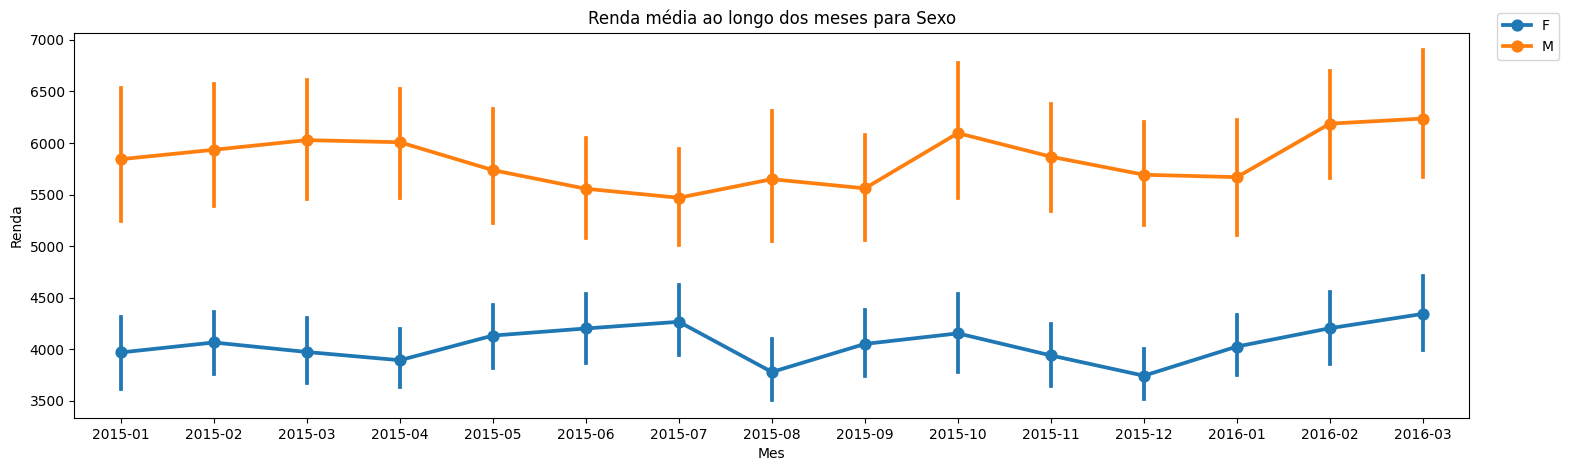

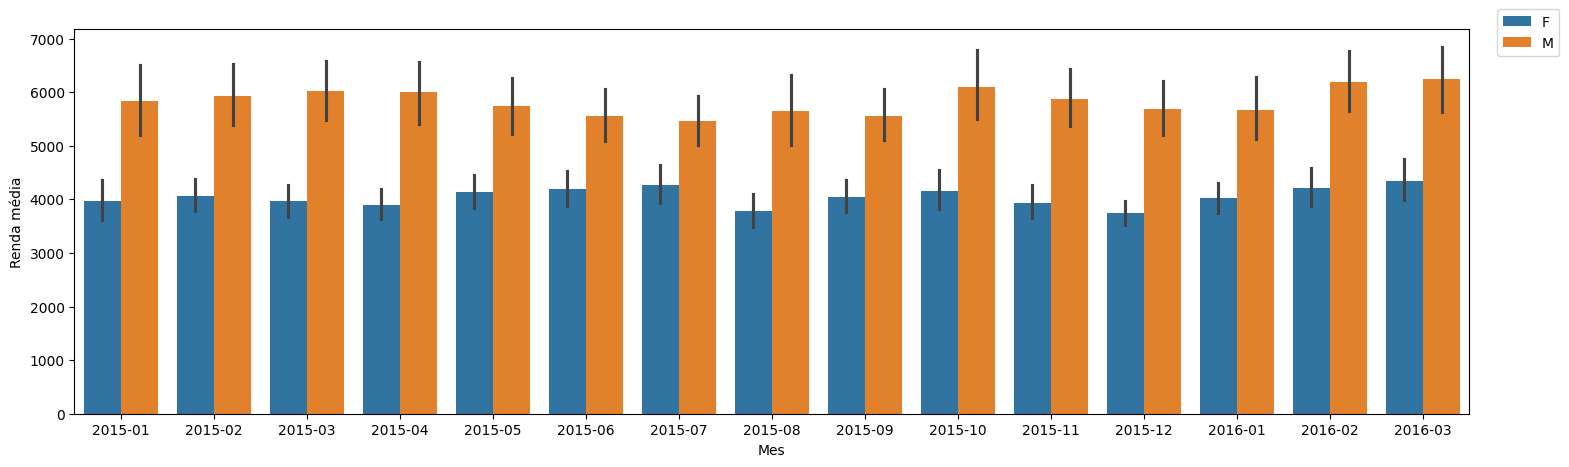

In [16]:
# Plotando do gráfico
c = 1
grafico_pontos(coluna=df_select.columns[c])
grafico_barras(coluna=df_select.columns[c])

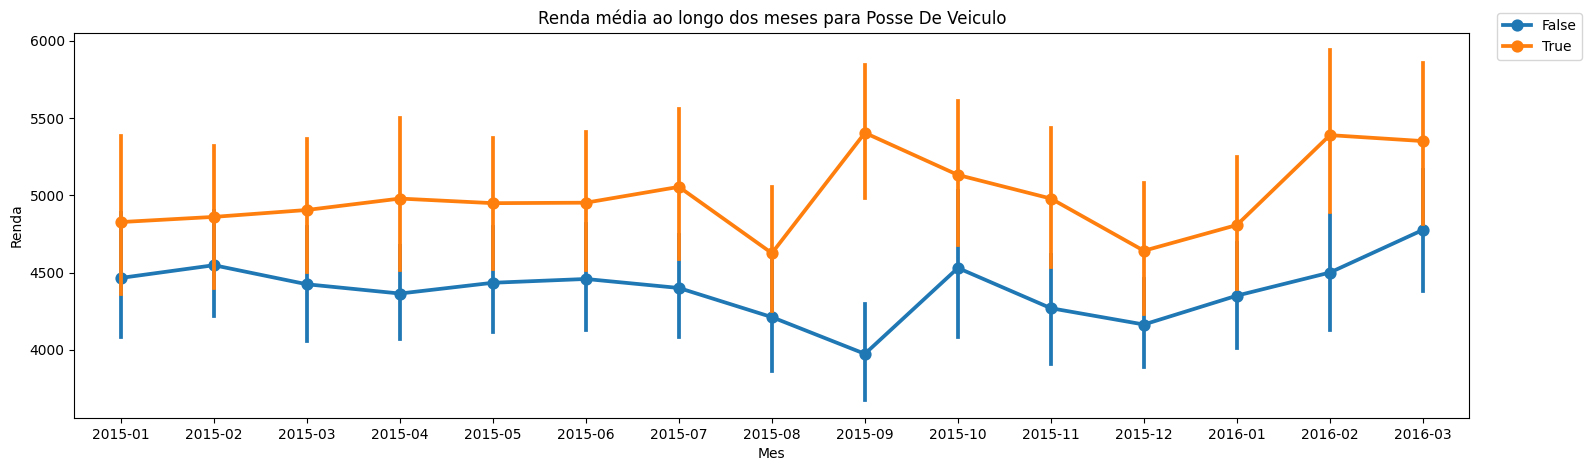

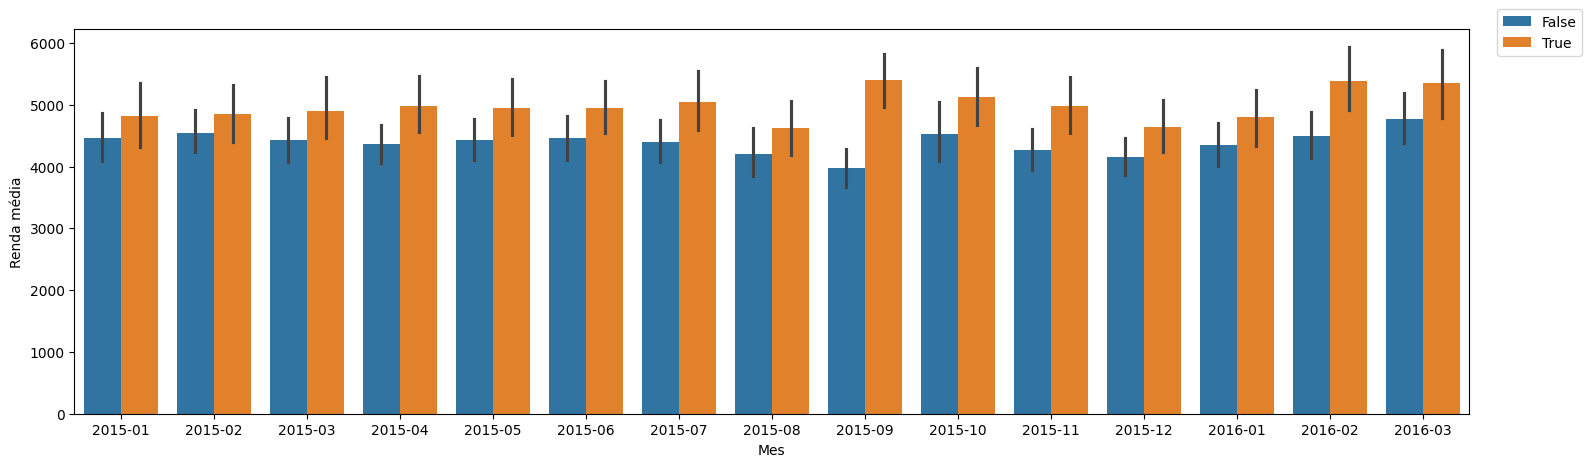

In [17]:
# Plotando do gráfico
c += 1
grafico_pontos(coluna=df_select.columns[c])
grafico_barras(coluna=df_select.columns[c])

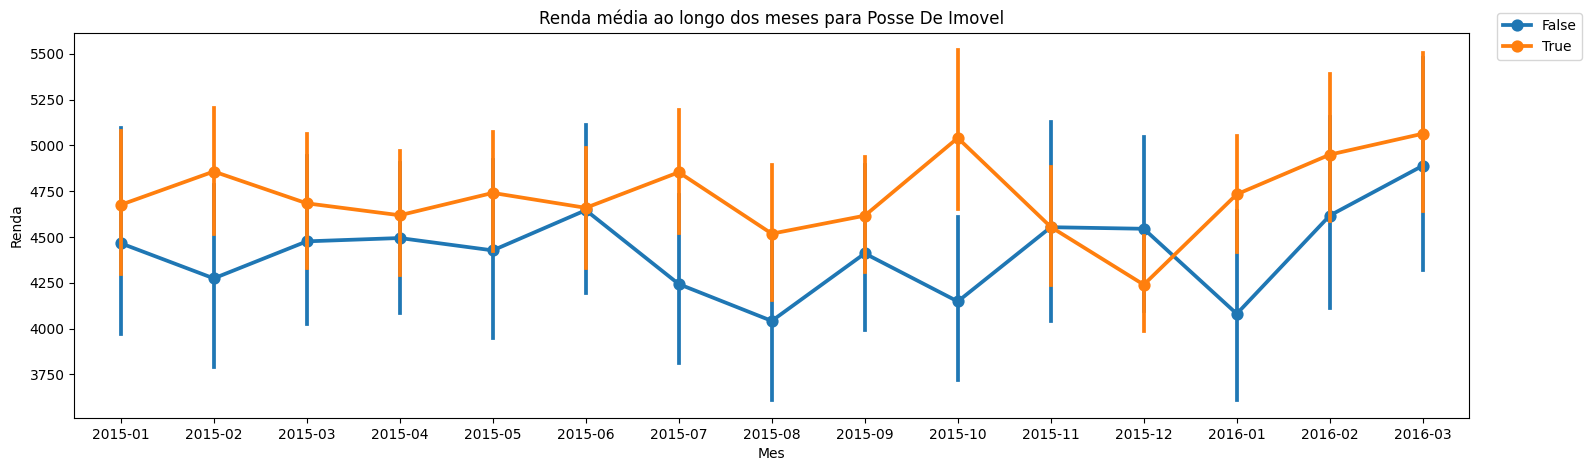

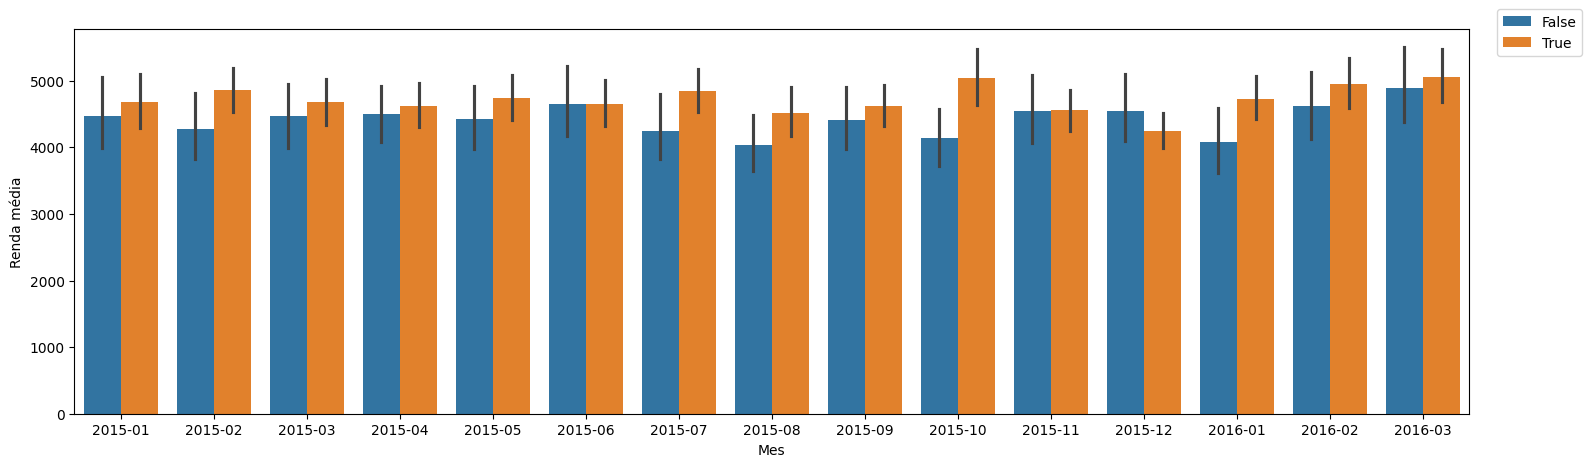

In [18]:
# Plotando do gráfico
c += 1
grafico_pontos(coluna=df_select.columns[c])
grafico_barras(coluna=df_select.columns[c])

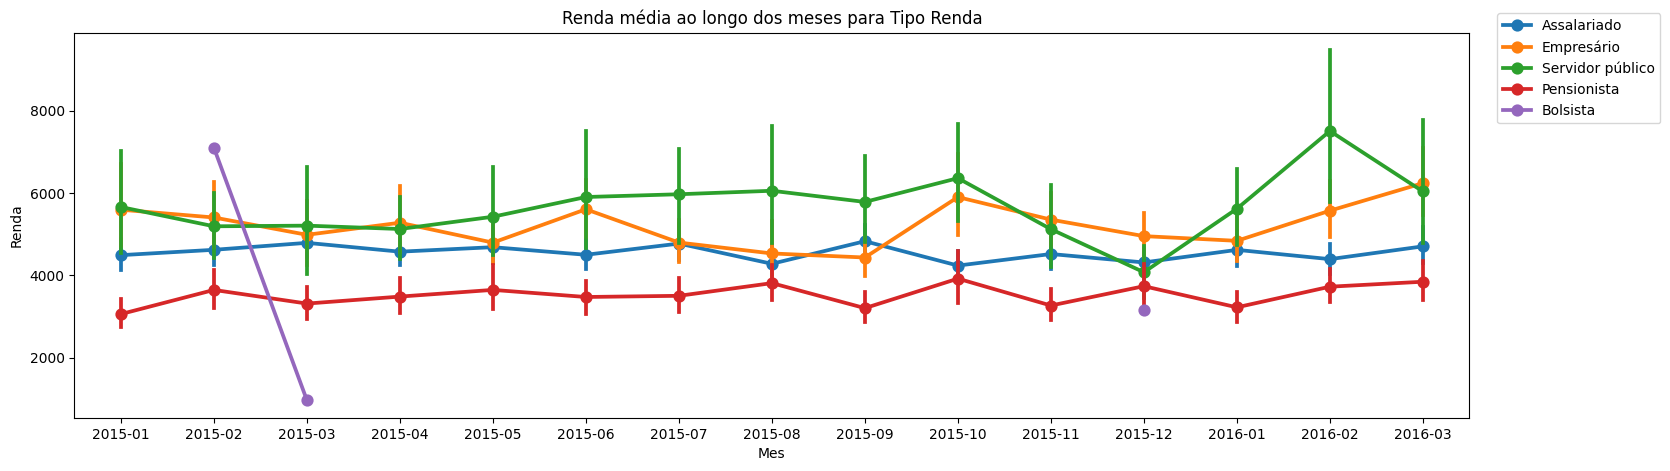

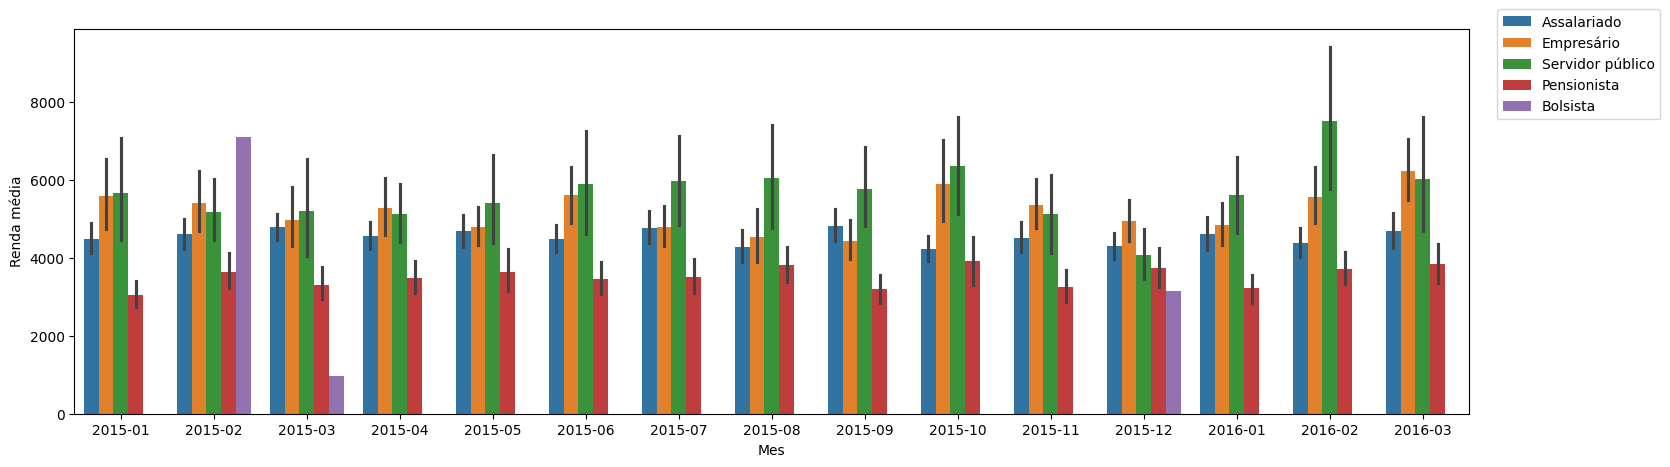

In [19]:
# Plotando do gráfico
c += 1
grafico_pontos(coluna=df_select.columns[c])
grafico_barras(coluna=df_select.columns[c])

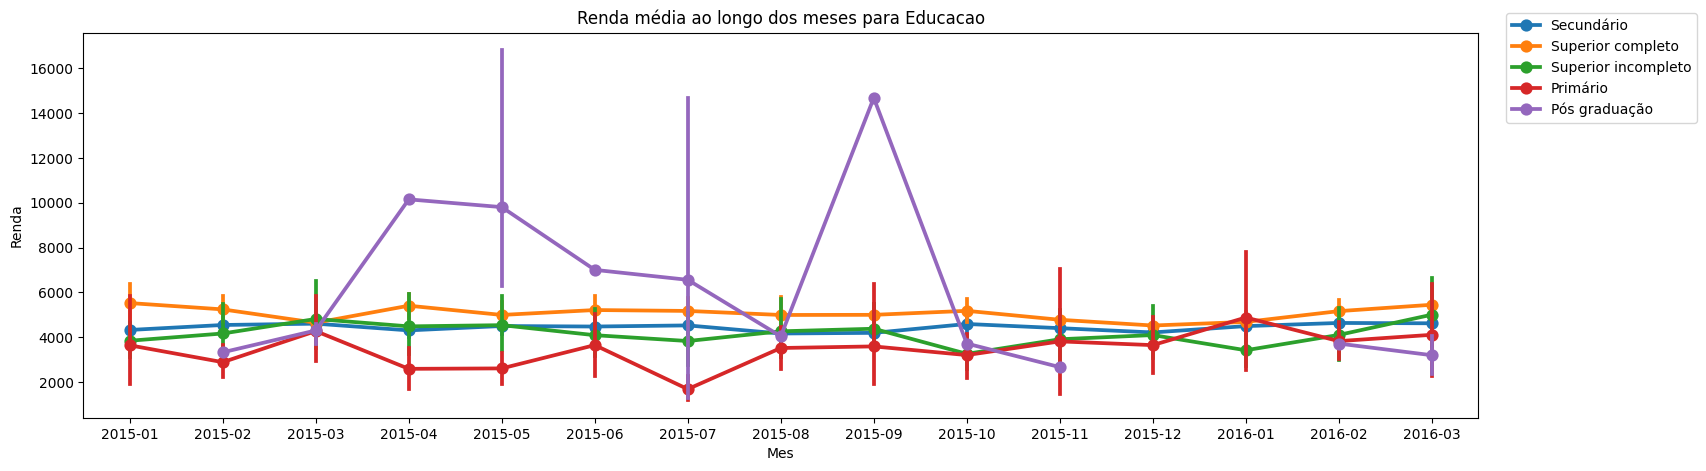

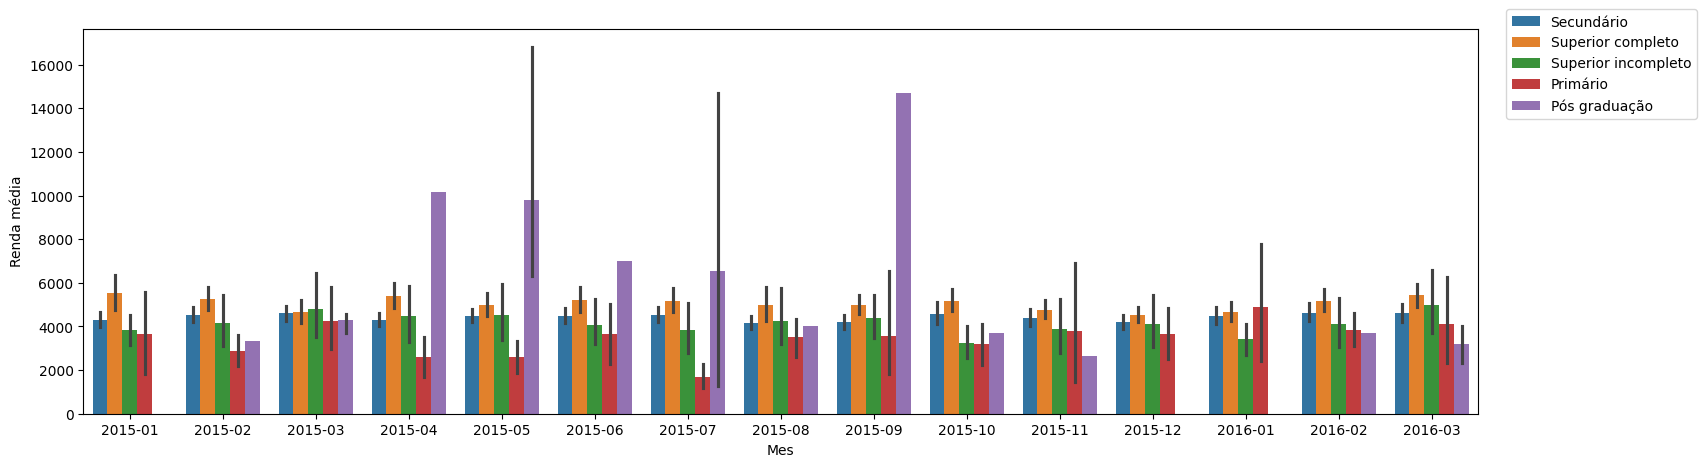

In [20]:
# Plotando do gráfico
c += 1
grafico_pontos(coluna=df_select.columns[c])
grafico_barras(coluna=df_select.columns[c])

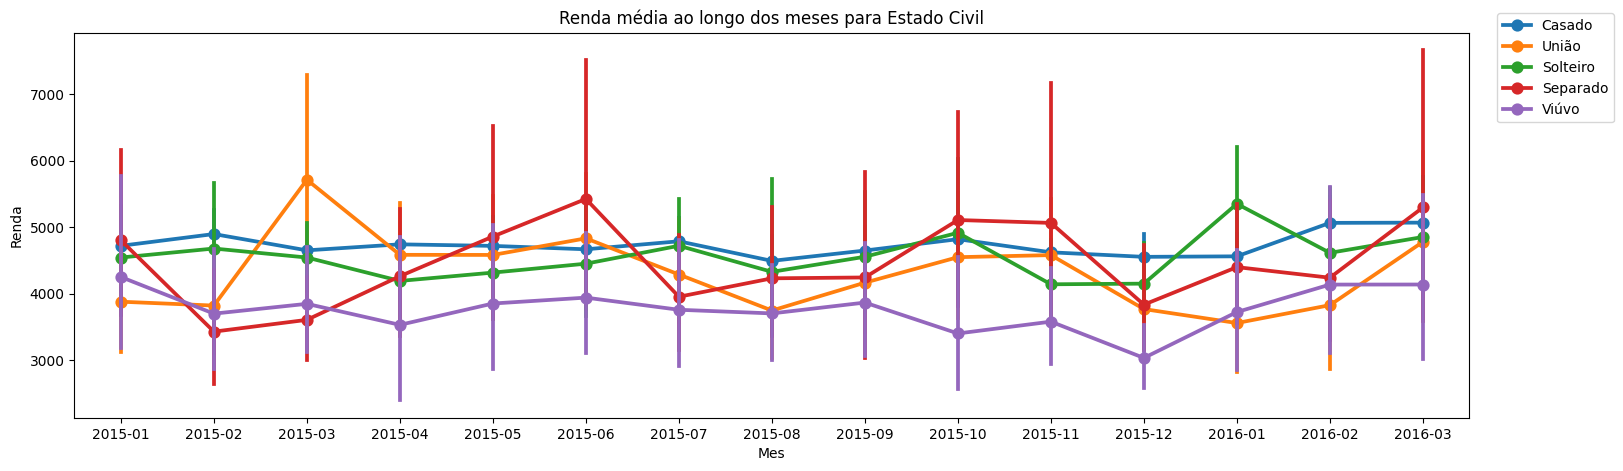

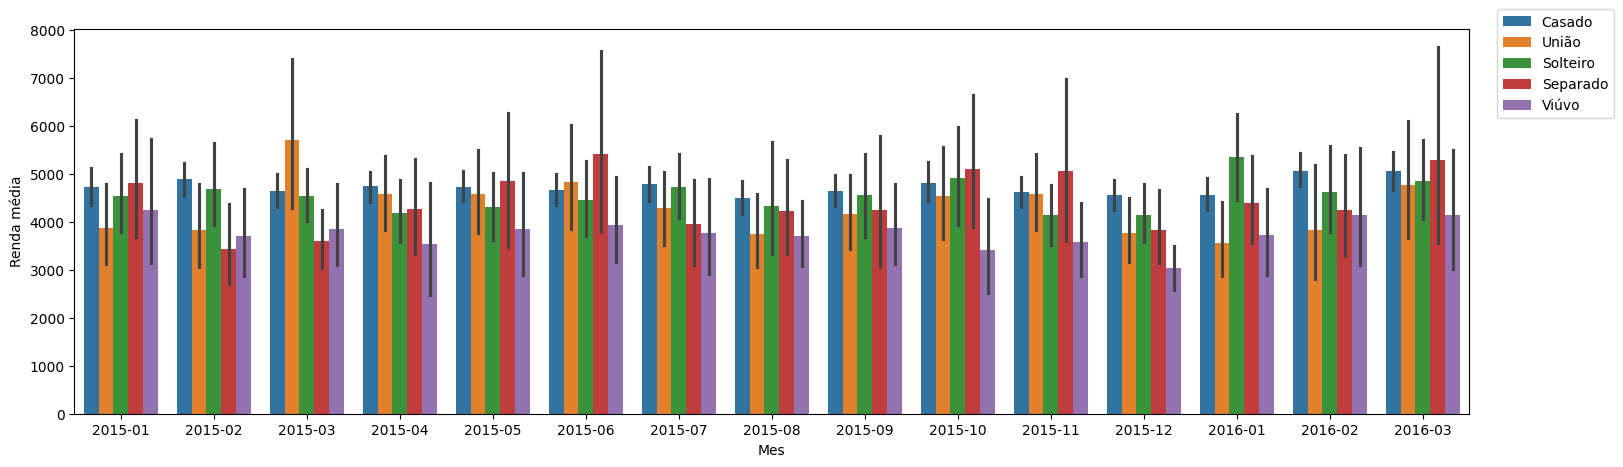

In [21]:
# Plotando do gráfico
c += 1
grafico_pontos(coluna=df_select.columns[c])
grafico_barras(coluna=df_select.columns[c])

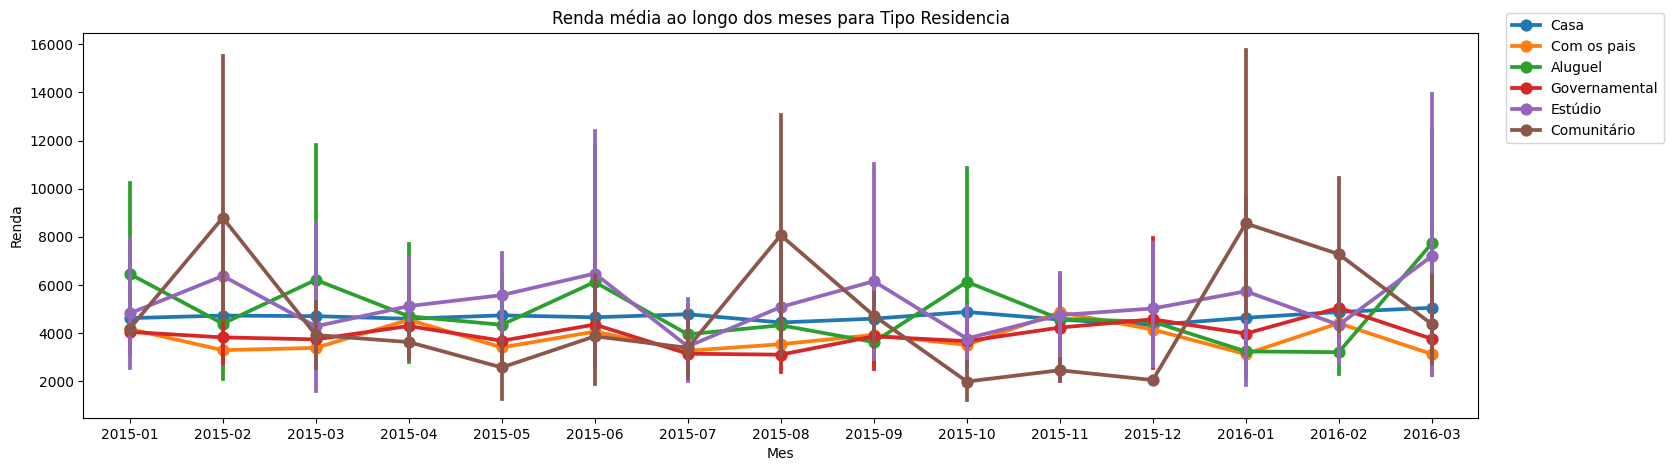

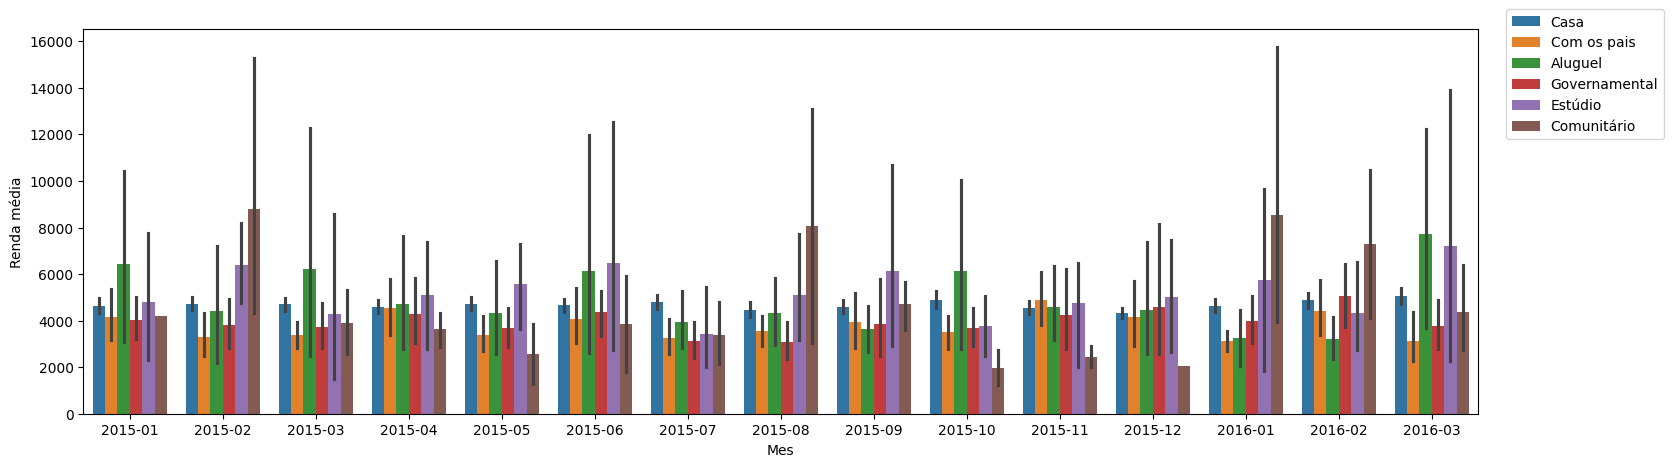

In [22]:
# Plotando do gráfico
c += 1
grafico_pontos(coluna=df_select.columns[c])
grafico_barras(coluna=df_select.columns[c])

## Conclusão

- Das variáveis qualitativas a que parece ser mais estável em relação a renda ao longo do tempo é **sexo**. Essa variável pode ser usada no modelo.

- As variáveis listadas abaixo podem ser consideradas relativamente estáveis e poderiam ser usadas no modelo, com caltela. Ao longo do tempo, em relação a renda, elas apresentam poucas variações:
  <br>-- posse_de_veiculo
  <br>-- posse_de_imovel
  <br>-- estado_civil
  <br>-- tipo_residencia

- Já na variéval **educacao** e a **tipo de renda**, na categoria *pós-graduação* e *Bolsista*, aparece uma variação no intervalor, que não está presente nos demais pontos. Não usaria essas duas variáveis no modelo